In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [2]:
from time_coords import str2datetime

Import raw dataset

In [3]:
DATASET_PATH = "gs://public-datasets-eumetsat-solar-forecasting/satellite/EUMETSAT/SEVIRI_RSS/v3/eumetsat_seviri_hrv_uk.zarr"

dataset = xr.open_dataset(
    DATASET_PATH,
    engine='zarr',
    chunks='auto'
)

Only accept certain range of times example

In [5]:
valid_times = dataset['data'].get_index('time')
start_time = valid_times[0]
end_time = str2datetime('2021-01-01 11:55:00')

times_in_range = list(filter(lambda t: t <= end_time and t >= start_time, valid_times))
len(times_in_range)

95613

Sel selects elements based on actual coordinate values (time, x, y). issel selects it based on index values (0 -> len-1).
If you pass in a slice() it will take in multiple values, which we'll always do for x and y, and for time if we want multiple images.

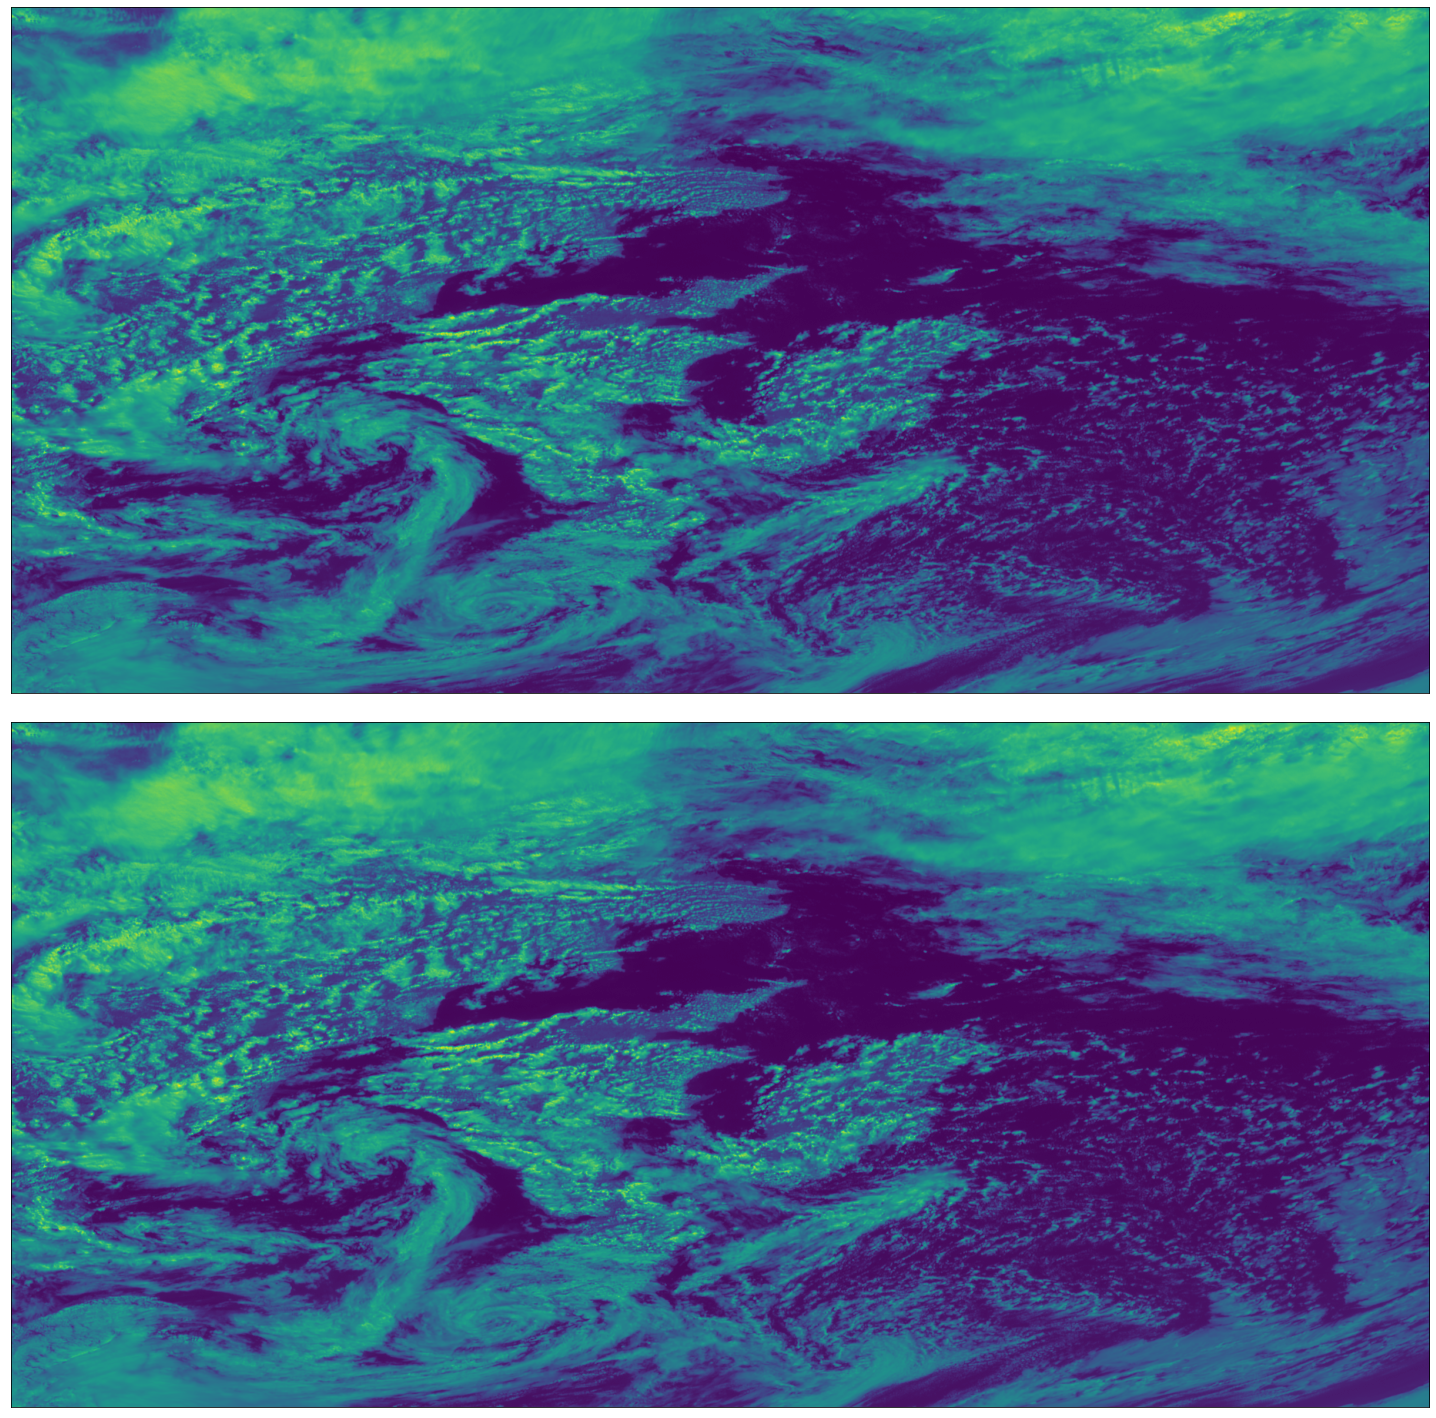

In [14]:
init_time = str2datetime('2020-01-01 15:00:00')
end_time = str2datetime('2020-05-01 15:00:00')

fig, axs = plt.subplots(2, 1, figsize=(20,20))

a_slice = dataset.sel(time=slice(init_time, end_time))

for i, ax in enumerate(axs):
    ax.imshow(dataset['data'].sel(time='2020-05-01 12:30:00').to_numpy(), cmap='viridis')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

fig.tight_layout()